###1. Import Library###


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

###2. Mempersiapkan data set###

In [ ]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.drop(columns='id', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


###3. Data Preprocessing###

In [ ]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data.shape

(5110, 11)

In [ ]:
data.dropna(how='any', inplace=True)

In [ ]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
numeric_columns = ['age', 'bmi', 'avg_glucose_level']
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

Visualisasi dan Plot

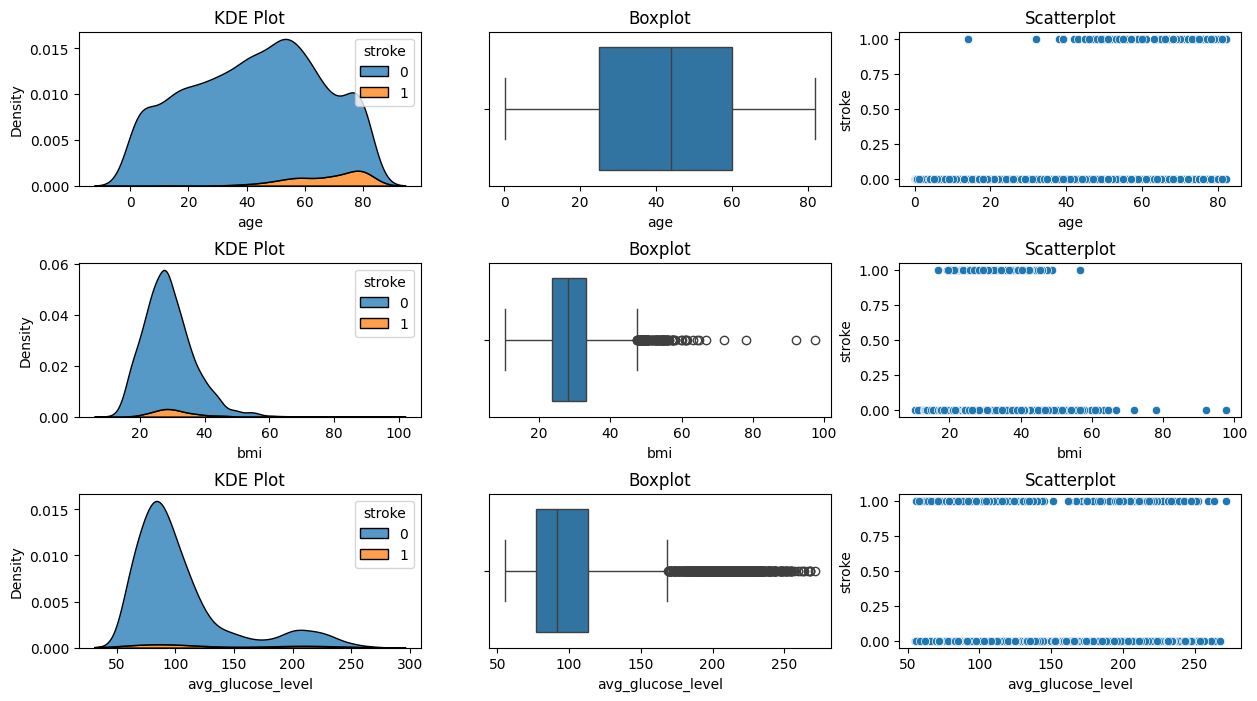

In [ ]:
i = 0
fig, ax = plt.subplots(3, 3, figsize=(15, 8))
plt.subplots_adjust(hspace=0.5)

for num_col in numeric_columns:
    # Plot KDE
    sns.kdeplot(x=num_col, hue='stroke', data=data, multiple='stack', ax=ax[i, 0])
    ax[i, 0].set_title("KDE Plot")

    # Plot Boxplot
    sns.boxplot(x=num_col, data=data, ax=ax[i, 1])
    ax[i, 1].set_title("Boxplot")

    # Plot Scatterplot
    sns.scatterplot(x=num_col, y='stroke', data=data, ax=ax[i, 2])
    ax[i, 2].set_title("Scatterplot")

    i += 1

plt.show()

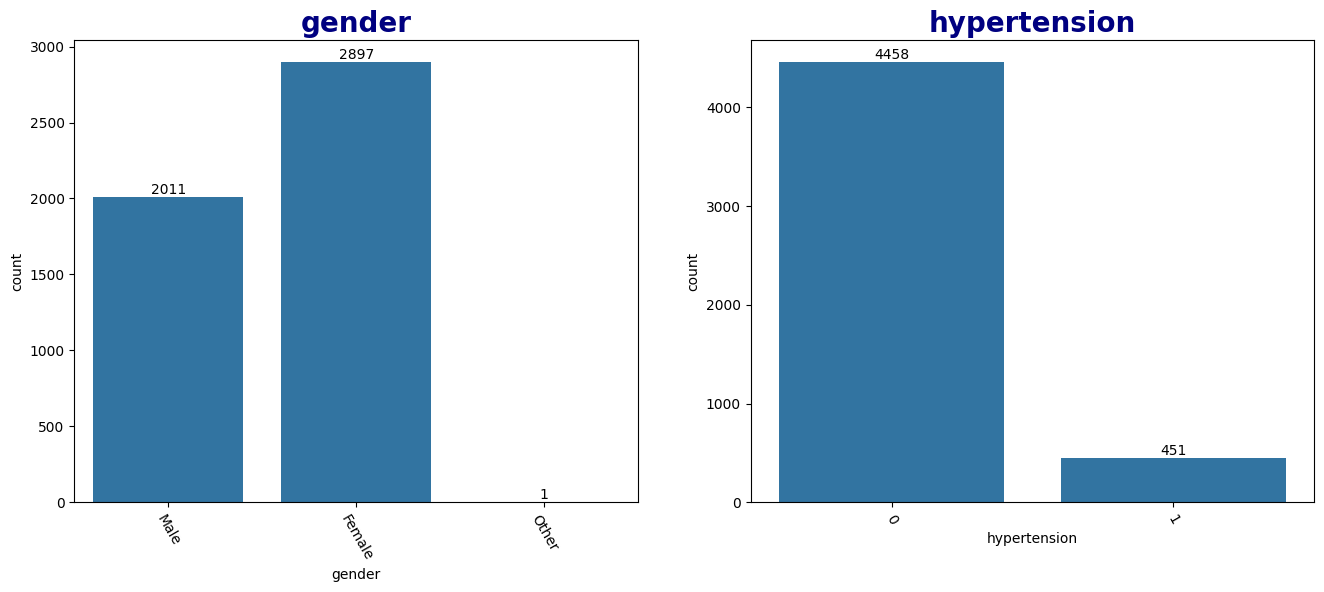

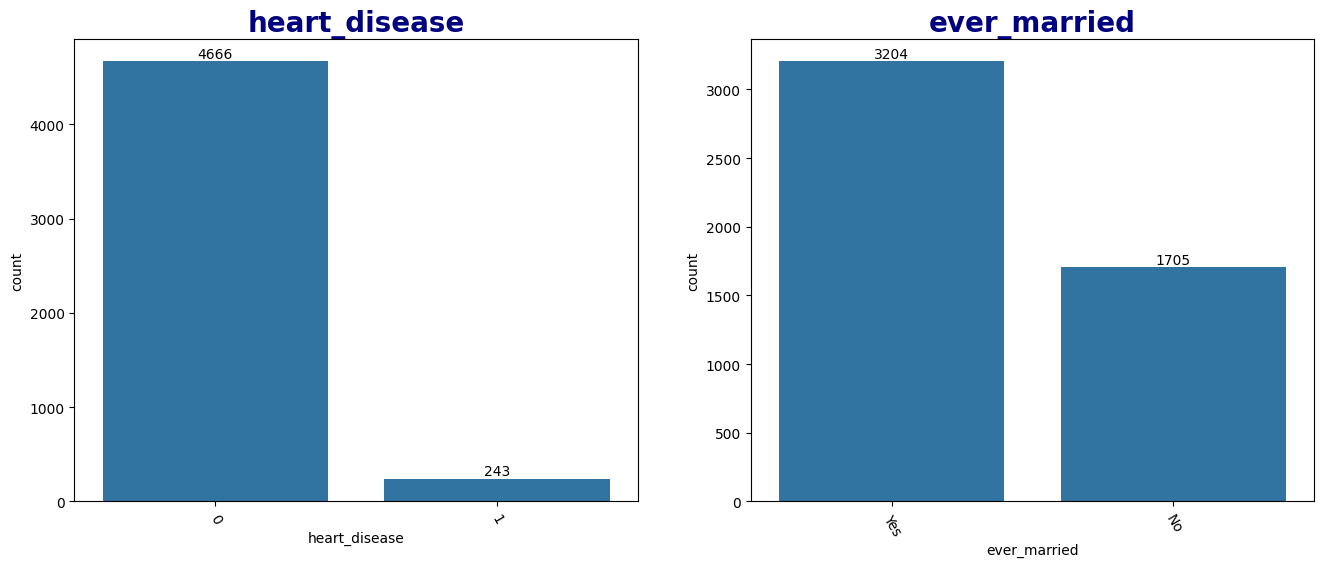

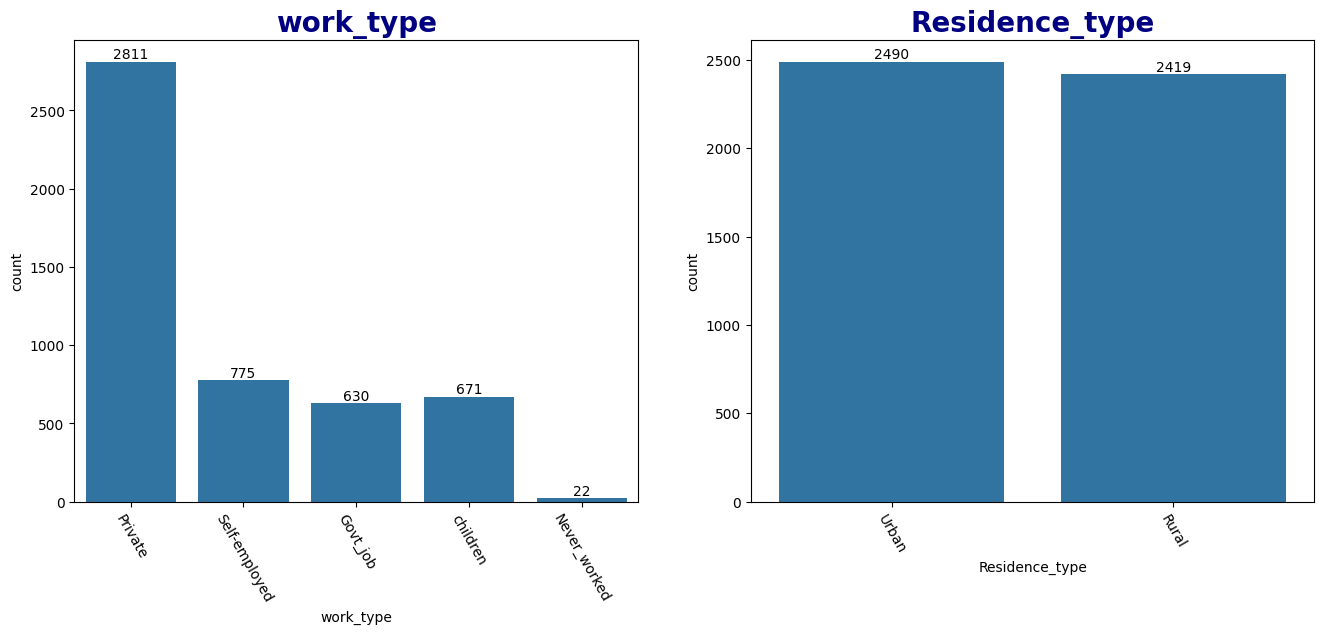

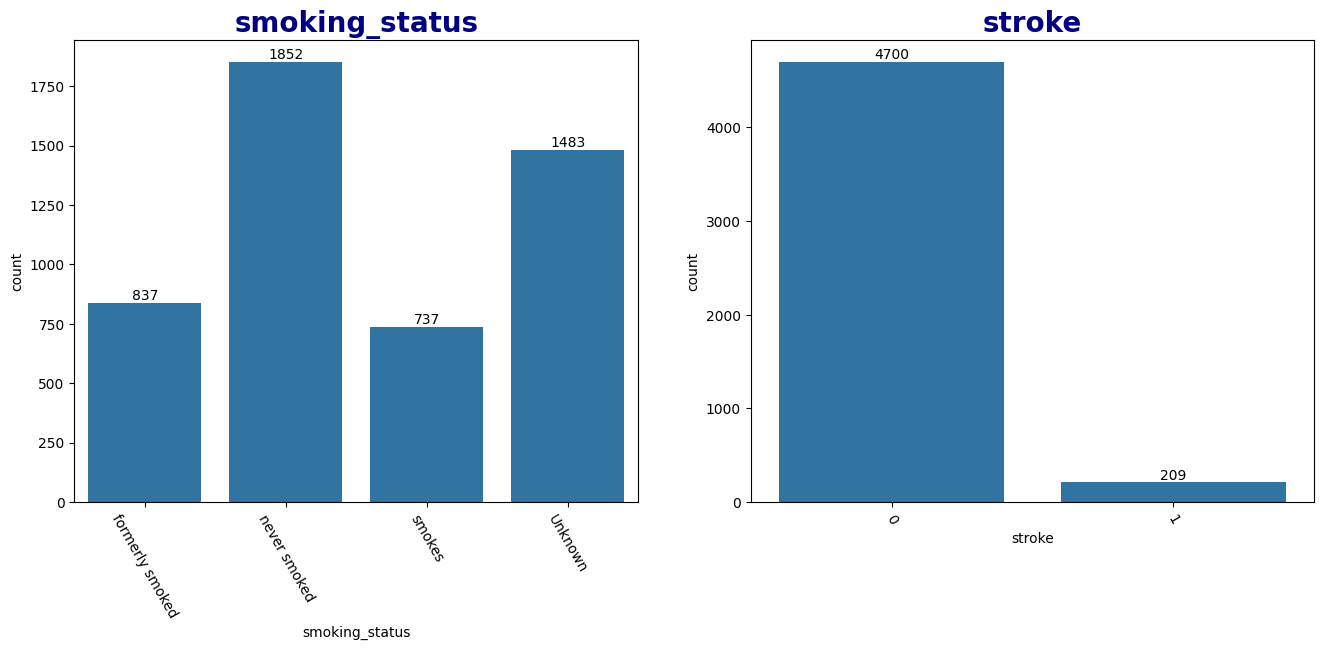

In [ ]:
i = 0
while i < 8:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot for the left axes
    ax_left = axes[0]
    ax_left.set_title(categorical_columns[i], size=20, weight='bold', color='navy')
    sns.countplot(x=categorical_columns[i], data=data, ax=ax_left)
    ax_left.bar_label(ax_left.containers[0])
    ax_left.tick_params(axis='x', rotation=300)
    i += 1

    # Plot for the right axes
    ax_right = axes[1]
    ax_right.set_title(categorical_columns[i], size=20, weight='bold', color='navy')
    sns.countplot(x=categorical_columns[i], data=data, ax=ax_right)
    ax_right.bar_label(ax_right.containers[0])
    ax_right.tick_params(axis='x', rotation=300)
    i += 1

    plt.show()


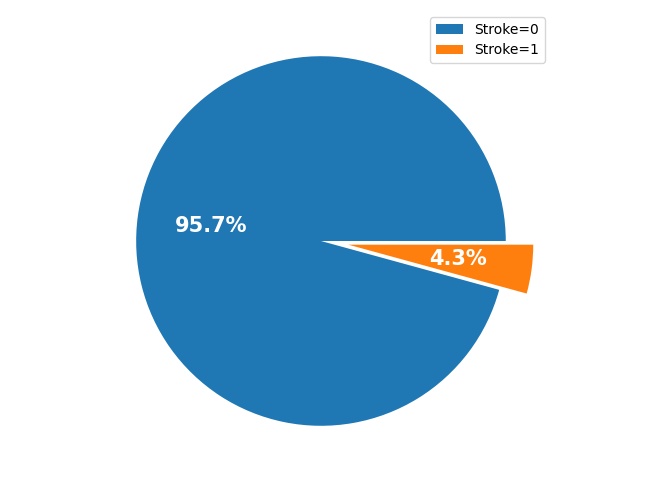

In [ ]:
x = data['stroke'].value_counts()

explode = [0, 0.15]
labels = ['Stroke=0', 'Stroke=1']
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

ax.pie(x, explode=explode, autopct='%1.1f%%', labels=labels, textprops=dict(color="w", weight='bold', size=15))
ax.legend()
plt.show()


Mentransformasi data

In [ ]:
columns_temp = ['gender', 'ever_married', 'work_type', 'smoking_status', 'Residence_type']

for col in columns_temp :
    print('column :', col)
    for index, unique in enumerate(data[col].unique()) :
        print(unique, ':', index)
    print('_'*45)

column : gender
Male : 0
Female : 1
Other : 2
_____________________________________________
column : ever_married
Yes : 0
No : 1
_____________________________________________
column : work_type
Private : 0
Self-employed : 1
Govt_job : 2
children : 3
Never_worked : 4
_____________________________________________
column : smoking_status
formerly smoked : 0
never smoked : 1
smokes : 2
Unknown : 3
_____________________________________________
column : Residence_type
Urban : 0
Rural : 1
_____________________________________________


In [ ]:
#gender
data_2 = data.replace(
    {'gender' : {'Male' : 0, 'Female' : 1, 'Other' : 2}}
)

#ever_married
data_2 =  data_2.replace(
    {'ever_married' : {'Yes' : 0, 'No' : 1}}
)

#work_type
data_2 =  data_2.replace(
    {'work_type' : {'Private' : 0, 'Self-employed' : 1, 'Govt_job' : 2, 'children' : 3, 'Never_worked' : 4}}
)

#smoking_status
data_2 =  data_2.replace(
    {'smoking_status' : {'formerly smoked' : 0, 'never smoked' : 1, 'smokes' : 2, 'Unknown' : 3}}
)

#Residence_type
data_2 =  data_2.replace(
    {'Residence_type' : {'Urban' : 0, 'Rural' : 1}}
)

In [ ]:
data_2 = data_2[data_2['gender'] != 2]

In [ ]:
data_2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.6,0,1
2,0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,1,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1,79.0,1,0,0,1,1,174.12,24.0,1,1
5,0,81.0,0,0,0,0,0,186.21,29.0,0,1


Normalisasi Data

In [ ]:
X_temp = data_2.drop(columns='stroke')
y = data_2.stroke

In [ ]:
scaler = MinMaxScaler().fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)
X.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000
mean,0.590261,0.522324,0.091891,0.049511,0.347188,0.210676,0.492665,0.231638,0.212996,0.528049
std,0.491836,0.275343,0.288901,0.216954,0.476125,0.281027,0.499997,0.205085,0.089969,0.363341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.304199,0.000000,0.000000,0.000000,0.000000,0.000000,0.101318,0.151203,0.333333
50%,1.000000,0.536133,0.000000,0.000000,0.000000,0.000000,0.000000,0.168775,0.203895,0.333333
75%,1.000000,0.731445,0.000000,0.000000,1.000000,0.500000,1.000000,0.269481,0.261168,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##4. Modelling##

In [ ]:
def plot_confusion_matrix(y_test, y_prediction):
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Greens")
    ax.set_xlabel('Prediced labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke'])
    ax.yaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke'])
    plt.show()

In [ ]:
# Splite X, y to train & test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

RandomForestClassifier

In [ ]:
#parameters
parameters = {
    'n_estimators' : [50, 100, 250, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2']
}

rf = RandomForestClassifier(n_jobs=-1)
rf_cv = GridSearchCV(estimator=rf, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', rf_cv.best_params_)
print('accuracy : ', rf_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 250}
accuracy :  0.9562610463061153


In [ ]:
# calculate time befor run algorithm
t1 = datetime.now()
# Model :
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)
# calculate time after run algorithm
t2 = datetime.now()

In [ ]:
#
y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print('RandomForestClassifier score : ', rf_score)

RandomForestClassifier score :  0.96


In [ ]:
delta = t2-t1
delta_rf = round(delta.total_seconds(), 3)
print('RandomForestClassifier takes : ', delta_rf, 'Seconds')

RandomForestClassifier takes :  1.155 Seconds


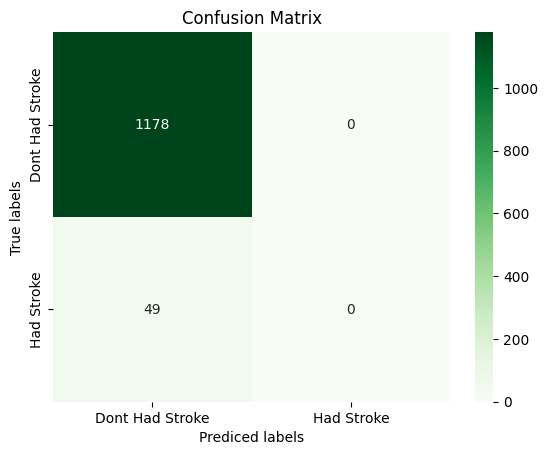

In [ ]:
plot_confusion_matrix(y_test, y_pred_rf)

In [ ]:
cr = metrics.classification_report(y_test, y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1178
           1       0.00      0.00      0.00        49

    accuracy                           0.96      1227
   macro avg       0.48      0.50      0.49      1227
weighted avg       0.92      0.96      0.94      1227



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTreeClassifier

In [ ]:
#parameters
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
        }



tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, y_train)



print('Tuned hyper parameters : ', tree_cv.best_params_)
print('accuracy : ', tree_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'log_loss', 'max_depth': 4, 'splitter': 'random'}
accuracy :  0.9565335218569577


In [ ]:
# Calculate time befor run algorithm :
t1 = datetime.now()
# Model :
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train, y_train)
# Calculate time after run algorithm :
t2 = datetime.now()

In [ ]:
y_pred_tree = tree.predict(X_test)

tree_score = round(tree.score(X_test, y_test), 3)
print('DecisionTreeClassifier Score : ', tree_score)

DecisionTreeClassifier Score :  0.96


In [ ]:
delta = t2-t1
delta_tree = round(delta.total_seconds(), 3)
print('DecisionTreeClassifier takes : ', delta_tree, 'Seconds')

DecisionTreeClassifier takes :  0.008 Seconds


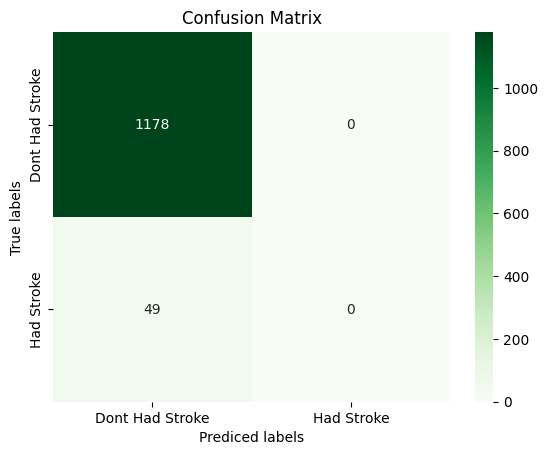

In [ ]:
plot_confusion_matrix(y_test, y_pred_tree)

In [ ]:
cr = metrics.classification_report(y_test, y_pred_tree)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1178
           1       0.00      0.00      0.00        49

    accuracy                           0.96      1227
   macro avg       0.48      0.50      0.49      1227
weighted avg       0.92      0.96      0.94      1227



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hasil Akhir

In [ ]:
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'DecisionTreeClassifier'],
    'Score' : [rf_score, tree_score,],
    'Delta_t' : [delta_rf, delta_tree,]
})

result

,Algorithm,Score,Delta_t
0,RandomForestClassifier,0.96,1.155
1,DecisionTreeClassifier,0.96,0.008


<ipython-input-56-86064ebd6ca8>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=result.Algorithm, rotation=300)
<ipython-input-56-86064ebd6ca8>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(labels=result.Algorithm, rotation=300)


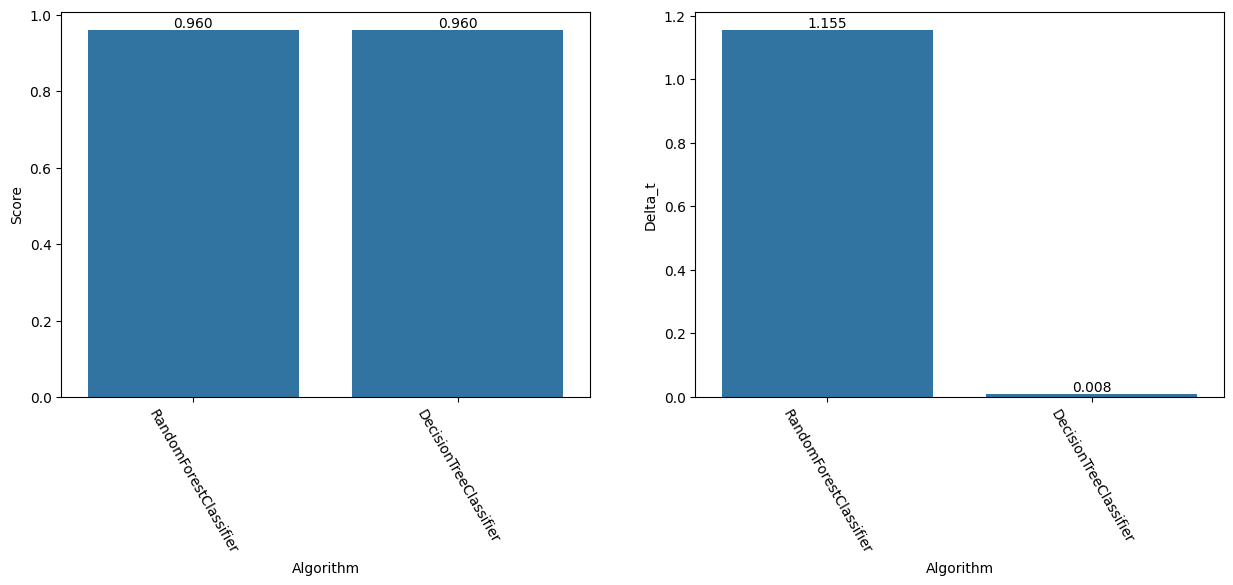

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result, ax=ax[0])
ax[0].bar_label(ax[0].containers[0], fmt='%.3f')
ax[0].set_xticklabels(labels=result.Algorithm, rotation=300)

sns.barplot(x='Algorithm', y='Delta_t', data=result, ax=ax[1])
ax[1].bar_label(ax[1].containers[0], fmt='%.3f')
ax[1].set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

##5. Kesimpulan##

Kedua model, RandomForestClassifier dan DecisionTreeClassifier, memiliki skor akurasi yang sama, yaitu 0.96. Namun, model DecisionTreeClassifier memiliki waktu eksekusi yang jauh lebih cepat dibandingkan RandomForestClassifier. Dengan Delta_t hanya 0.008 detik, model DecisionTreeClassifier mungkin lebih efisien dalam penggunaan sumber daya komputasi.